<a href="https://colab.research.google.com/github/cjstntjd/machine/blob/master/basic_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import numpy as np 
import pandas as pd

data = pd.read_csv('/gdrive/My Drive/자료들/simple_regression.txt',names=['A','B'],header=None,sep=' ')

In [0]:
data.head()

,A,B
0,50.496375,7.312312
1,69.017336,9.949010
2,6.504676,0.402668
3,47.202416,7.372892
4,40.427390,5.413481


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
A    100 non-null float64
B    100 non-null float64
dtypes: float64(2)
memory usage: 1.7 KB


In [0]:
data.describe()

,A,B
count,100.000000,100.000000
mean,34.391096,4.912107
std,19.477392,2.704478
min,-2.462339,0.157369
25%,18.419056,2.765651
50%,31.478168,4.544430
75%,51.582227,7.315034
max,69.017336,9.949010


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f31dc0fe198>,
      dtype=object)

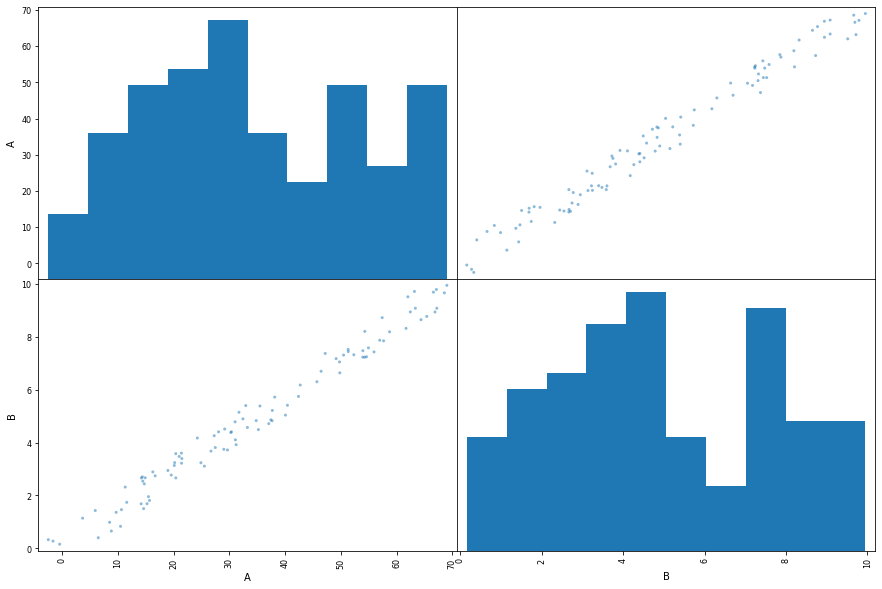

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

attributes = ['A','B']
scatter_matrix(data[attributes],figsize=(15,10))

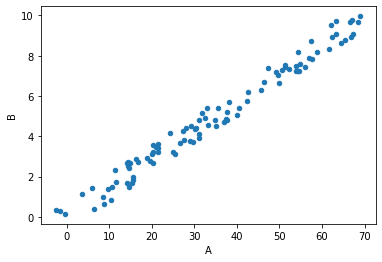

In [0]:
data.plot(kind='scatter',x='A',y='B')

In [0]:
train_x = data.drop(['B'],axis=1)
train_y = data['B']

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,make_scorer

scorer = make_scorer(mean_squared_error,greater_is_better = False)

def rmse_cv_train(model):
  rmse=np.sqrt(-cross_val_score(model,train_x,train_y,scoring=scorer,cv=10))
  return(rmse)

In [0]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_x,train_y)

print('rmse train', rmse_cv_train(lr).mean())

rmse train 0.422556637640107


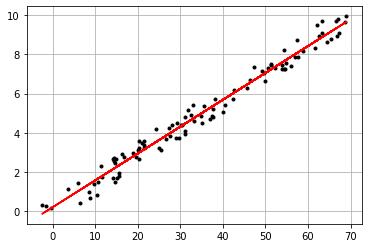

In [0]:
plt.plot(data['A'],data['B'],'k.')
plt.grid(True)
plt.plot(data['A'],lr.predict(train_x),color='r')